In [1]:
from helpers import *

# Try to vary gradient instead of power for spilling

In [11]:
initial_power = 49 * si.uW 
initial_grad = 1.5 *si.G/si.cm

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= initial_grad,
    grad_r=0,
    power_tweezer=initial_power,
    waist_tweezer= 1 * si.um,
    a=184.4*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),

    wvl = 1064 * si.nm,
)

zr = float(trap.subs(trap.get_tweezer_rayleigh()))
print(f"zr={zr*1e6}um")

print(f"{float(trap.subs(trap.get_omega_ax_tweezer()))}Hz")
print(f"{trap.subs(trap.a *2*trap.power_tweezer/(np.pi*trap.waist_tweezer**2)/ const.k) /si.uK} uK")

aspect_ratio = trap.get_omega_r_tweezer() / trap.get_omega_ax_tweezer()
_aspect_ratio_latex = sp.latex(trap.omega_r_tweezer / trap.omega_ax_tweezer)
display(Math(f"{_aspect_ratio_latex} \\approx {trap.subs(aspect_ratio).evalf():.2f}"))

zr=2.952624674426497um
3879.36034722613Hz
1.29394674177543 uK


<IPython.core.display.Math object>

[1.09863993e+15 9.18685788e+09 4.97230892e+05 9.24102276e+01
 5.97167510e-02] s
-2.5424609279680885e-30


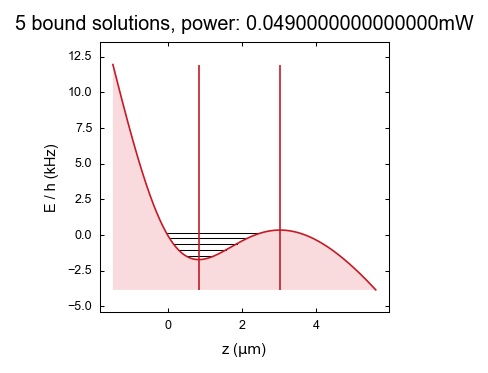

In [9]:
trap[trap.grad_z] = 0.1*initial_grad
plot_solutions(trap,100,-0.5*zr,1.9*zr,n_pot_steps=1000,display_plot=-2,state_mult=1e3)

  0%|          | 0/150 [00:00<?, ?it/s]<lambdifygenerated-1690>:2: RuntimeWarning: overflow encountered in scalar power
  return 9.91508168485294e-41*z/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2) - 4.05199317290834e-24
<lambdifygenerated-1691>:2: RuntimeWarning: overflow encountered in scalar power
  return -3.96603267394118e-40*z**2/(pi**5*(z**2/pi**2 + 8.83317315846006e-13)**3) + 9.91508168485294e-41/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2)
c:\Users\peter\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_root_scalar.py:326: RuntimeWarning: Derivative was zero.
  r, sol = methodc(f, x0, args=args, fprime=fprime, fprime2=fprime2, **kwargs)
  1%|          | 1/150 [00:00<01:07,  2.22it/s]<lambdifygenerated-1695>:2: RuntimeWarning: overflow encountered in scalar power
  return -3.96603267394118e-40*z**2/(pi**5*(z**2/pi**2 + 8.83317315846006e-13)**3) + 9.91508168485294e-41/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2)
  2%|▏         | 3/150 [00:00<00:38,  3.83it/s]<lambdi

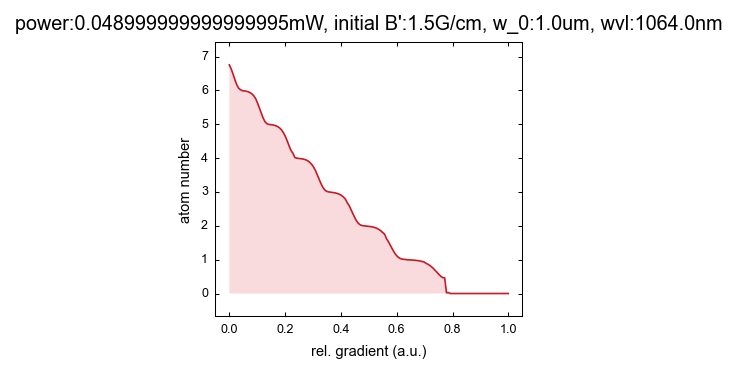

In [12]:
trap[trap.power_tweezer] = initial_power
trap[trap.grad_z] = initial_grad
plot_occupation_grad(trap,100,-0.15*zr,1.9*zr,grad_fac_down=0,grad_fac_up=1,n_spill_steps=150,n_pot_steps=int(1e3),t_spill=25*si.ms)

  0%|          | 0/50 [00:00<?, ?it/s]

 94%|█████████▍| 47/50 [01:54<00:01,  2.48it/s]<lambdifygenerated-1074>:2: RuntimeWarning: overflow encountered in scalar power
  return 6.681550963956e-41*z/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2) - 2.67062937174555e-24
<lambdifygenerated-1075>:2: RuntimeWarning: overflow encountered in scalar power
  return -2.6726203855824e-40*z**2/(pi**5*(z**2/pi**2 + 8.83317315846006e-13)**3) + 6.681550963956e-41/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2)
c:\Users\peter\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_root_scalar.py:326: RuntimeWarning: Derivative was zero.
  r, sol = methodc(f, x0, args=args, fprime=fprime, fprime2=fprime2, **kwargs)
 96%|█████████▌| 48/50 [01:54<00:00,  2.79it/s]<lambdifygenerated-1078>:2: RuntimeWarning: overflow encountered in scalar power
  return 6.61275243797947e-41*z/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2) - 2.67062937174555e-24
<lambdifygenerated-1079>:2: RuntimeWarning: overflow encountered in scalar power
  return -2.645100975

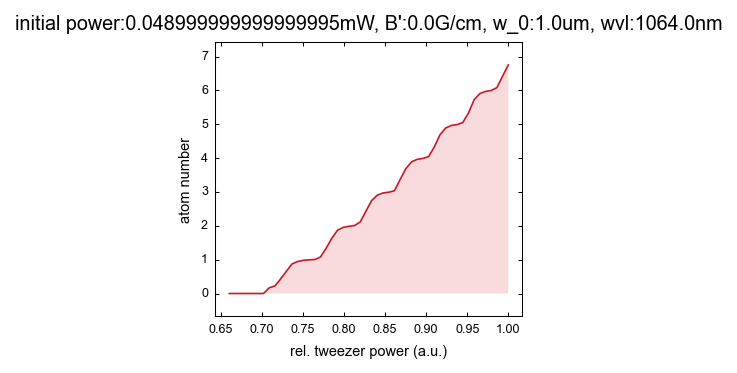

In [7]:
trap[trap.power_tweezer] = initial_power
trap[trap.grad_z] = 0*initial_grad
plot_occupation(trap,100,-0.15*zr,1.9*zr,power_fac_down=0.66,power_fac_up=1,n_spill_steps=50,n_pot_steps=int(1e3),t_spill=25*si.ms)